In [4]:
import pandas as pd
merged_df= pd.read_csv('../archive/merged_churn.csv' )
print(f"number of rows: {len(merged_df)}")


number of rows: 6000


In [5]:
# how many precent are churned 
# normalize= true gives the decimal proportion (0 to 1)
proportions= merged_df['churned'].value_counts(normalize= True)

#multiply by 100 to get percentage
churn_percentage= proportions['Yes'] *100
print(f" churned percentage: {churn_percentage:.2f} %")
#as churned percentage is 15.4 the data is imbalanced so accuray
#is misleading, we should pay attention to F1/precision/Recall
#ratio=> 1:5.5

 churned percentage: 15.48 %


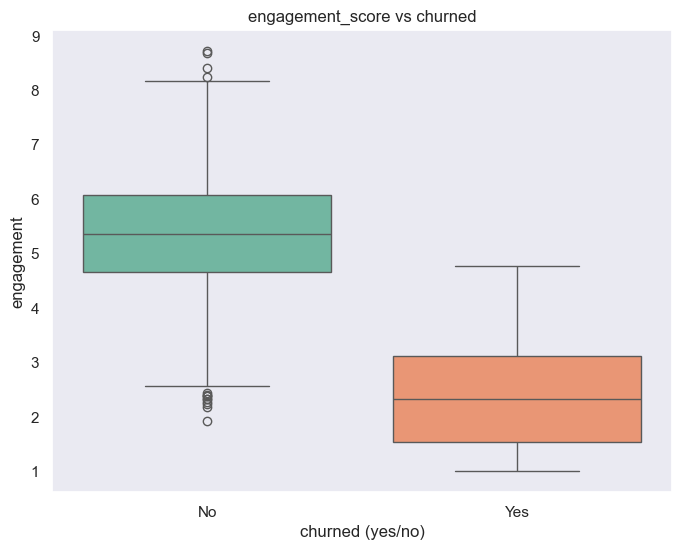

In [6]:
# plotting engagemet/churned
import seaborn as sns 
import matplotlib.pyplot as plt 

# set the visual style
sns.set_theme(style= "dark")

plt.figure(figsize=(8,6))
sns.boxplot(data= merged_df, x='churned', y='engagement_score',palette='Set2',hue='churned',legend=False)

plt.title("engagement_score vs churned")
plt.xlabel("churned (yes/no)")
plt.ylabel("engagement")
plt.show()


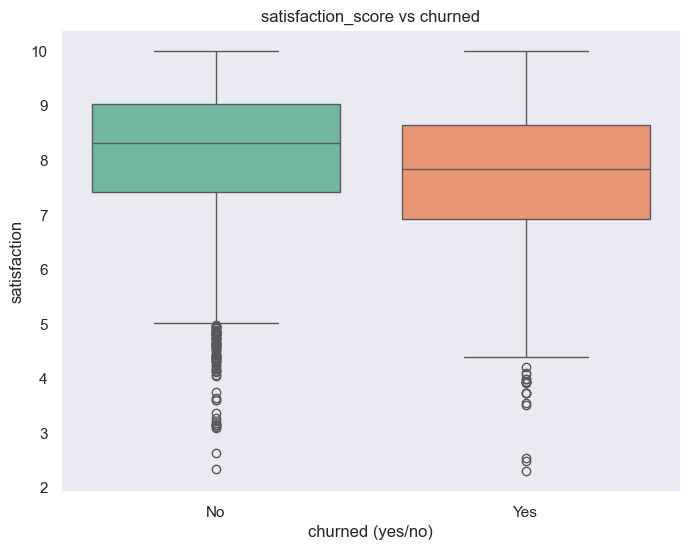

In [7]:
# churned vs satisfaction
sns.set_theme(style= "dark")

plt.figure(figsize=(8,6))
sns.boxplot(data= merged_df, x='churned', y='satisfaction_score',palette='Set2',hue='churned',legend=False)

plt.title("satisfaction_score vs churned")
plt.xlabel("churned (yes/no)")
plt.ylabel("satisfaction")
plt.show()


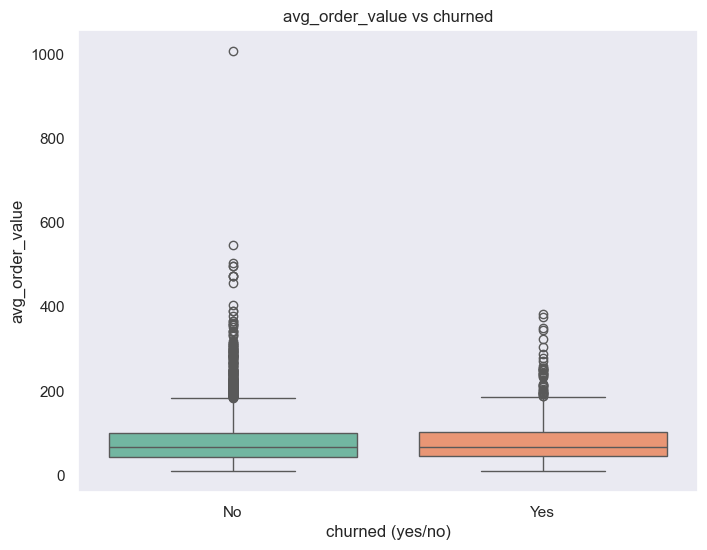

In [8]:
# churned vs orders
sns.set_theme(style= "dark")

plt.figure(figsize=(8,6))
sns.boxplot(data= merged_df, x='churned', y='avg_order_value',palette='Set2',hue='churned',legend=False)

plt.title("avg_order_value vs churned")
plt.xlabel("churned (yes/no)")
plt.ylabel("avg_order_value")
plt.show()


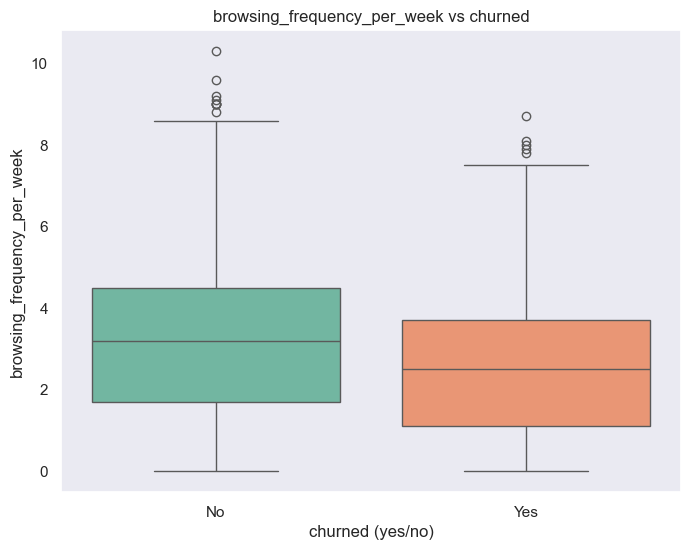

In [9]:
# churned vs browsing_frequency_per_week
sns.set_theme(style= "dark")

plt.figure(figsize=(8,6))
sns.boxplot(data= merged_df, x='churned', y='browsing_frequency_per_week',palette='Set2',hue='churned',legend=False)

plt.title("browsing_frequency_per_week vs churned")
plt.xlabel("churned (yes/no)")
plt.ylabel("browsing_frequency_per_week")
plt.show()


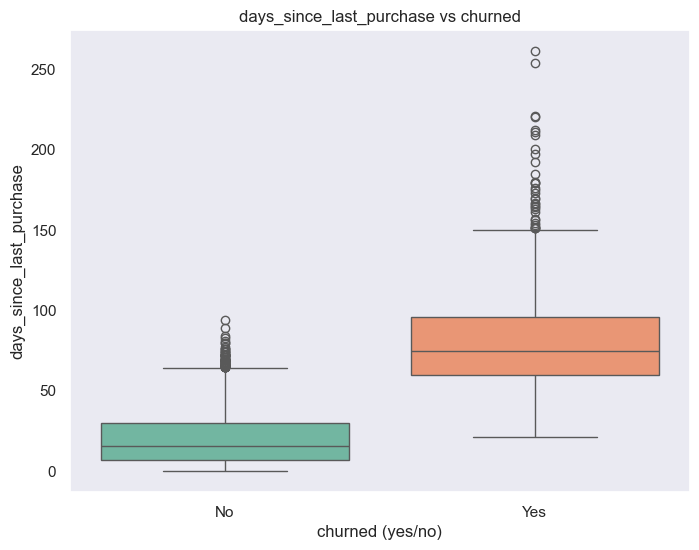

In [10]:
# churned vs days sice purches
#leakage!!!

plt.figure(figsize=(8,6))
sns.boxplot(data= merged_df, x='churned', y='days_since_last_purchase',palette='Set2',hue='churned',legend=False)

plt.title("days_since_last_purchase vs churned")
plt.xlabel("churned (yes/no)")
plt.ylabel("days_since_last_purchase")
plt.show()

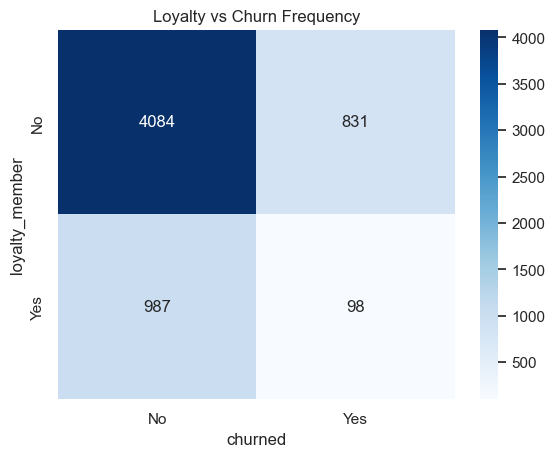

In [33]:

ct = pd.crosstab(merged_df['loyalty_member'], merged_df['churned'])

# Plot as a heatmap
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.title('Loyalty vs Churn Frequency')
plt.show()

In [20]:

# medians 
medians = merged_df.groupby('churned')['engagement_score'].median()
diff_eng = medians['No'] - medians['Yes']
print(f"The difference between the medians is: {diff_eng}")
#we should test model with/without this feature because the difference between yes and no medians is big


medians = merged_df.groupby('churned')['satisfaction_score'].median()
diff_sat = medians['No'] - medians['Yes']
print(f"The difference between the medians is: {diff_sat:.2f}")

medians = merged_df.groupby('churned')['avg_order_value'].median()
diff_order = medians['No'] - medians['Yes']
print(f"The difference between the medians is: {diff_order:.2f}")
#we should test model with/without this feature because the difference between yes and no medians is  big


medians = merged_df.groupby('churned')['browsing_frequency_per_week'].median()
diff_brows = medians['No'] - medians['Yes']
print(f"The difference between the medians is: {diff_brows:.2f}")

medians = merged_df.groupby('churned')['days_since_last_purchase'].median()
diff_days = medians['No'] - medians['Yes']
print(f"The difference between the medians is: {diff_days}")
#we should test model with/without this feature because the difference between yes and no medians is rather big


all_medians= [diff_eng, diff_sat, diff_order, diff_brows, diff_days]
sorted_medians= sorted(all_medians, reverse= True)
print(sorted_medians)

The difference between the medians is: 3.04
The difference between the medians is: 0.46
The difference between the medians is: -1.78
The difference between the medians is: 0.70
The difference between the medians is: -59.0
[3.04, 0.7000000000000002, 0.46000000000000085, -1.7800000000000011, -59.0]


<Axes: xlabel='engagement_score', ylabel='days_since_last_purchase'>

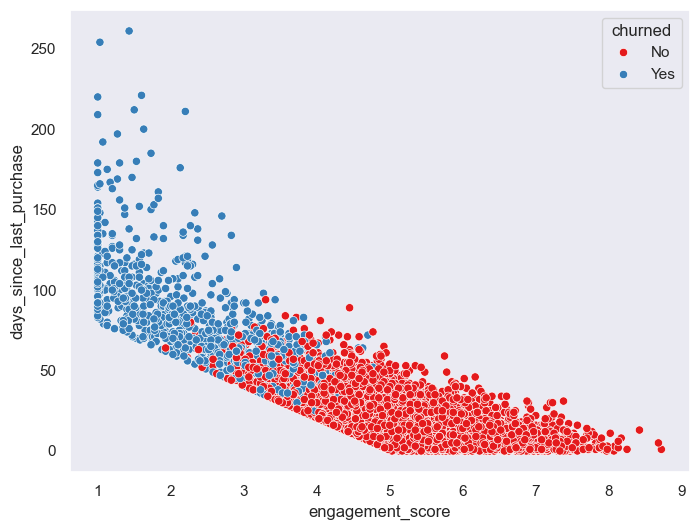

In [24]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    data=merged_df,
    x='engagement_score',
    y='days_since_last_purchase',
    hue='churned',
    palette='Set1',
    
)
    

                             account_age_months  avg_order_value  \
account_age_months                     1.000000         0.017591   
avg_order_value                        0.017591         1.000000   
total_orders                           0.449134         0.025869   
days_since_last_purchase              -0.000801         0.021002   
discount_usage_rate                   -0.011647         0.008745   
return_rate                            0.001135        -0.013739   
customer_support_tickets               0.005951        -0.006064   
browsing_frequency_per_week            0.006257         0.001863   
cart_abandonment_rate                  0.025530        -0.007663   
product_review_score_avg              -0.012792        -0.001756   
engagement_score                       0.096825        -0.007816   
satisfaction_score                    -0.011226         0.004561   
price_sensitivity_index               -0.015563        -0.270585   

                             total_orders  days

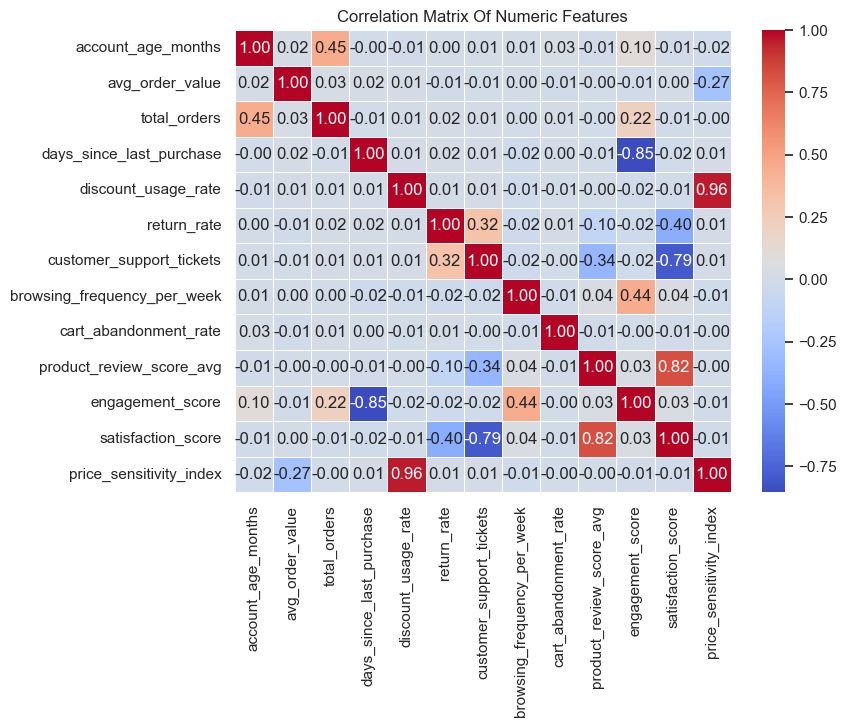

In [39]:
#building a heatmapto find out the correlations

# we have to elimimate the cols that are not numeric because we want to compare features to find correlations
#build a new numeric dataframe
numeric_df= merged_df.drop(columns=['churned','loyalty_member','Customer_ID'])


#we use .corr() to build correlation matrix based on that dataframe, this calculates pearson correlation coefficient 
#which measures the linear relationship between variables on scale from -1,1
corr_matrix= numeric_df.corr()
print(corr_matrix)

#Visualize with a Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidth=0.5)
plt.title('Correlation Matrix Of Numeric Features')
plt.show()
#We will test models with and without redundant features

In [ ]:
#Churn rate: 15.48% (moderate imbalance)

#Strongest drivers: days_since_last_purchase, engagement_score, browsing_frequency_per_week

#Loyalty members churn less (if confirmed by churn rate comparison)

#Potential leakage: days_since_last_purchase → evaluate model with/without it

#highly correlated pairs:
#discount_usage_rate ↔ price_sensitivity_index (very strong positive correlation)
# ↔ satisfaction_score (strong positive correlation)
#days_since_last_purchase ↔ engagement_score (strong negative correlation)

